In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open("../most_sensitive_indices_in_training_softmax.json") as f:
    sensitive_neurons = json.load(f)

with open("../most_effective_indices_on_eigenscore_softmax.json") as f:
    effective_neurons = json.load(f)




In [7]:
print("sensitive_neurons", sensitive_neurons)
print("effective_neurons", effective_neurons)

sensitive_neurons {'156': 0.0022092022082096526, '17': 0.0021683768511845396, '413': 0.0020592616384099644, '98': 0.002033237384884801, '229': 0.0020251079286560244, '271': 0.002018347662555777, '291': 0.0020154817383219266, '118': 0.002005894938707064, '426': 0.002004791084950011, '11': 0.00200057103096466, '465': 0.001999982837955299, '71': 0.0019992465123129834, '328': 0.0019989679738123523, '215': 0.0019982308121597706, '456': 0.0019969381387048677, '439': 0.0019950423658659363, '492': 0.0019930742512382065, '29': 0.00199285111938605, '6': 0.0019921251597429016, '142': 0.0019904411751767775, '95': 0.001988665611137028, '376': 0.0019821528999001197, '282': 0.0019820932262349057, '496': 0.00198180179144051, '107': 0.0019811129531918338, '197': 0.00197521892327474, '35': 0.001974625347749852, '314': 0.001974507459491238, '194': 0.001974135866801587, '246': 0.0019737762226009745, '54': 0.001973671759189129, '191': 0.00197342565694037, '325': 0.001973419143448179, '416': 0.0019731636124

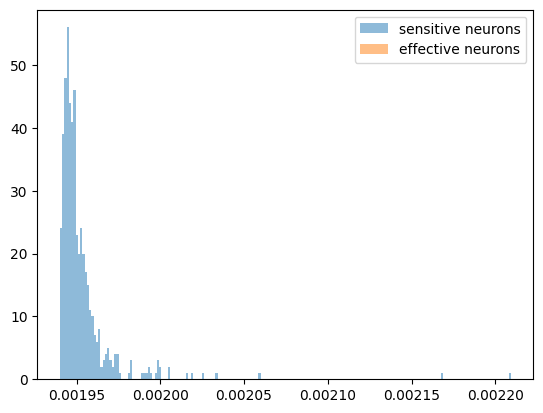

In [2]:
# given the two dictionaries, since each dictionary has the same keys, and the values are probabilities summing up to 1 for each dict, plot the distribution of the values 

sensitive_neurons_values = np.array(list(sensitive_neurons.values()))
effective_neurons_values = np.array(list(effective_neurons.values()))

plt.hist(sensitive_neurons_values, bins=200, alpha=0.5, label='sensitive neurons')
plt.hist(effective_neurons_values, bins=200, alpha=0.5, label='effective neurons')
plt.legend(loc='upper right')
plt.show()


[156  17 413  98 229 271 291 118 426  11 465  71 328 215 456 439 492  29
   6 142  95 376 282 496 107 197  35 314 194 246  54 191 325 416 263 308
 419 274 398 264 394 374 433 395 150  78 269 358 242  56 249 441 342  22
 171 112 476 152 365  40 312 322 301 256  81 391 231 463 176 121 316 189
 237 198 190 132 313 267 455  13  14 438 475 430 177 122 460 383 216 409
 230 113 327 338  30 129 161 247 320  61 279 143 336 166  15 470   2 339
 208 499 257 346 212  84 418 287 154 226 181  19 261 185  53 484  85  93
 494  87 334 462 179 158 172 146 160   8 298 123 228 116 423 486 491 201
  68 434  74 299 101 459 290 485 218 490 254  80  51 403 266 258 482 447
  47  28 331 200 222 205 421 138  92 259 351 388 415 468 207 149  24 204
 265 111  99 173 155 302  39 368 125 443 406 276  70 192  77 506 284 234
  26 315 170 504 392 411 199 251 466  41  76 135 488 131 120 353  31 370
  46 349 180  44 452 174 481 153  72 285 375 454 233 297 117  36 223  59
 321 163 178 211 133 310 360 502 508 209  83 497  2

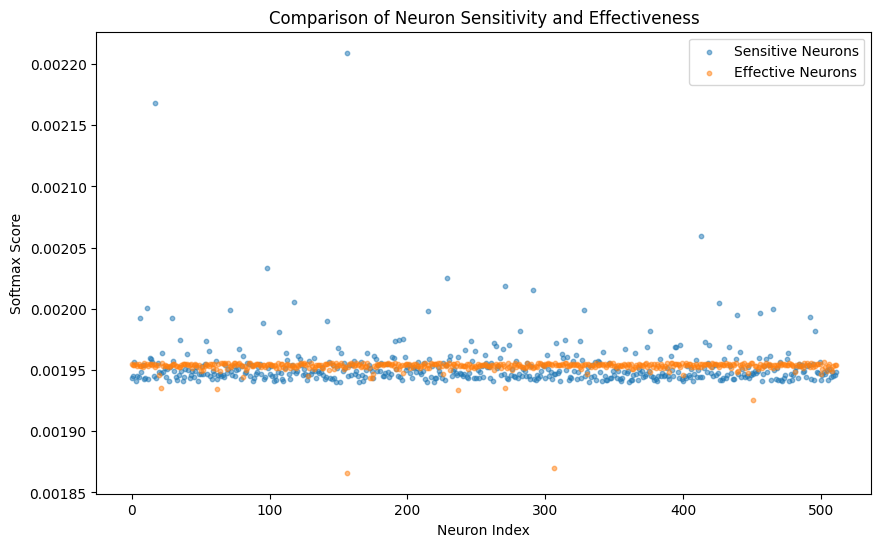

In [13]:


# get the array for the keys of sorted values of the sensitive neurons decreasing
sorted_indices = sorted(sensitive_neurons, key=sensitive_neurons.get, reverse=True)
sorted_indices2 = sorted(effective_neurons, key=effective_neurons.get, reverse=True)
sorted_indices = np.array(sorted_indices).astype(int)
print(sorted_indices)
print(sorted_indices2)

# Get the sensitive values in the order of sorted indices
sensitive_values_sorted = np.array([sensitive_neurons[str(i)] for i in sorted_indices])

# Get the effective values in the order of sorted indices
# Ensure that the keys are strings if they are stored as such in effective_neurons
effective_values_sorted = np.array([effective_neurons[str(i)] for i in sorted_indices])

# Now, you can use sensitive_values_sorted and effective_values_sorted for plotting or analysis

# Update the plotting code to use the sorted values
plt.figure(figsize=(10, 6))
plt.scatter(sorted_indices, sensitive_values_sorted, alpha=0.5, label='Sensitive Neurons', s=10)
plt.scatter(sorted_indices, effective_values_sorted, alpha=0.5, label='Effective Neurons', s=10)
plt.title('Comparison of Neuron Sensitivity and Effectiveness')
plt.xlabel('Neuron Index')
plt.ylabel('Softmax Score')
plt.legend()
plt.show()

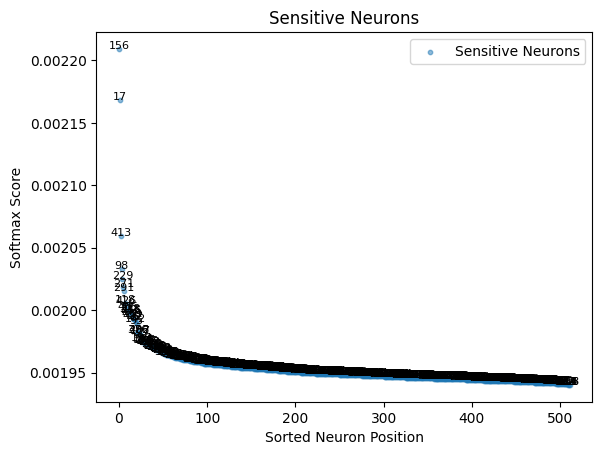

In [6]:
# Scatter plot
plt.scatter(range(len(sorted_indices)), sensitive_values_sorted, alpha=0.5, label='Sensitive Neurons', s=10)

# Annotate each point with its corresponding index from sorted_indices
for i, txt in enumerate(sorted_indices):
    plt.annotate(txt, (i, sensitive_values_sorted[i]), fontsize=8, ha='center')

plt.title('Sensitive Neurons')
plt.xlabel('Sorted Neuron Position')
plt.ylabel('Softmax Score')
plt.legend()
plt.show()

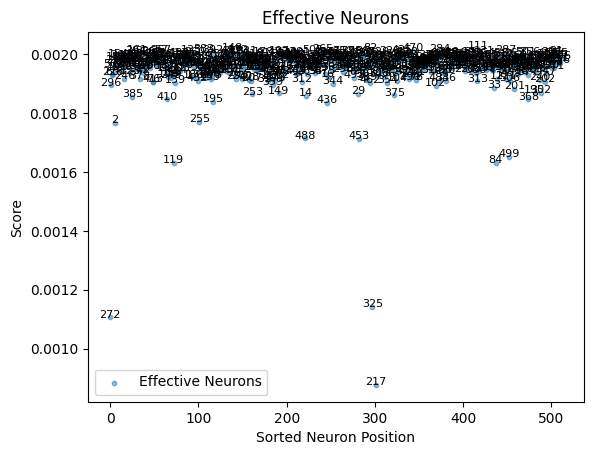

In [9]:
# Scatter plot for effective neurons
plt.scatter(range(len(sorted_indices2)), effective_values_sorted, alpha=0.5, label='Effective Neurons', s=10)

# Annotate each point with its corresponding index from sorted_indices_effective
for i, txt in enumerate(sorted_indices2):
    plt.annotate(txt, (i, effective_values_sorted[i]), fontsize=8, ha='center')

plt.title('Effective Neurons')
plt.xlabel('Sorted Neuron Position')
plt.ylabel('Score')
plt.legend()
plt.show()